In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
df = pd.read_csv('iris_2class.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


In [4]:
# Calcule as estatísticas descritivas de cada um dos atributos (características) agrupando por espécie;
df.groupby('especie').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
especie                             ...                          
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

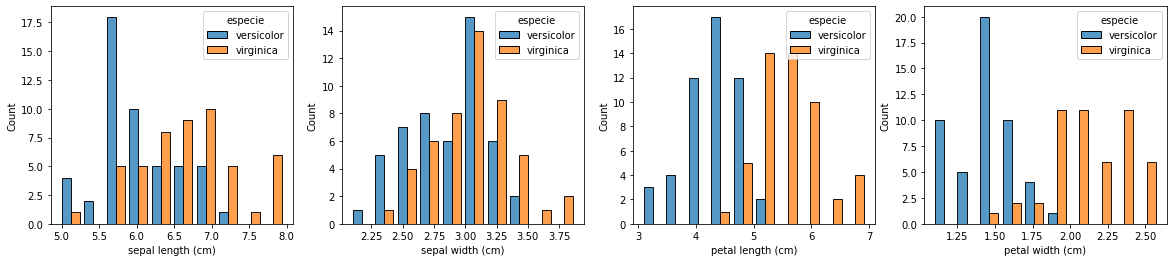

In [3]:
# Faça um histograma para cada atributo. Faça barras separadas para cada espécie de flor.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
sns.histplot(data=df, bins=10, x="sepal length (cm)", hue="especie", multiple="dodge", shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x="sepal width (cm)", hue="especie", multiple="dodge", shrink=0.8, ax=axes[1])
sns.histplot(data=df, bins=10, x="petal length (cm)", hue="especie", multiple="dodge", shrink=0.8, ax=axes[2])
sns.histplot(data=df, bins=10, x="petal width (cm)", hue="especie", multiple="dodge", shrink=0.8, ax=axes[3])
plt.show()

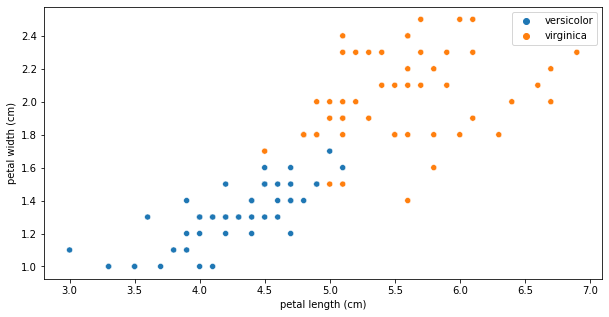

In [20]:
# Com base nos passos 1 e 2, faça scatterplots com os pares de atributos que parecerem ser os mais promissores para classificação das espécies.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, y="petal width (cm)", x="petal length (cm)", hue="especie")
plt.legend()
plt.show()


### Analisando o gráfico, escolhemos o atributo petal length

In [10]:
def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[0] <= limiar: #petal length
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['Flower'])

### Executando busca exaustiva

##### Faça uma busca exaustiva procurando maximizar a acurácia no conjunto de teste. Use 80% dos dados para o conjunto de treino e 20% para o conjunto de teste.

In [11]:
def busca_exaustiva(n_limiares, atributos, rotulos, begin_range, end_range):
    limiares = np.linspace(begin_range, end_range, n_limiares)

    melhor_limiar = limiares[0]
    melhor_acuracia = 0
    
    for limiar in limiares:
        predicoes = classificador_limiar(limiar, atributos)
        acuracia = accuracy_score(rotulos, predicoes['Flower'])
    
        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar
    
    return melhor_acuracia, melhor_limiar




In [12]:
dados_para_separar = df[["petal length (cm)", "petal width (cm)"]]

X_treino, X_teste, y_treino, y_teste = train_test_split(dados_para_separar, df['especie'],
                                                       test_size=0.2, stratify=df['especie'].tolist(),
                                                       shuffle=True,
                                                       random_state=10)

melhor_acuracia, melhor_limiar = busca_exaustiva(10, X_teste, y_teste, 4.3, 5)
predicoes = classificador_limiar(melhor_limiar, X_teste)
acc_teste = accuracy_score(y_teste, predicoes['Flower'])

print(melhor_acuracia, acc_teste, melhor_limiar)

1.0 1.0 4.766666666666667


### Execute a busca exaustiva implementada no passo 5 com 20 particionamentos diferentes. Reporte a acurácia máxima e mínima obtida. Calcule a acurácia média e o desvio padrão.

In [13]:
acuracias = []

for i in range(20):
    dados_para_separar = df[["petal length (cm)", "petal width (cm)"]]
    X_treino, X_teste, y_treino, y_teste = train_test_split(dados_para_separar, df['especie'],
                                                        test_size=0.2,     
                                                        stratify=df['especie'].tolist(),
                                                        shuffle=True,
                                                        random_state=i)

    melhor_acuracia, melhor_limiar = busca_exaustiva(100, X_treino, y_treino, 4.3, 5.2)
    
    predicoes = classificador_limiar(melhor_limiar, X_teste)
    acc = accuracy_score(y_teste, predicoes['Flower'])
    acuracias.append(acc)
    

In [19]:
minimo = np.min(acuracias)
maximo = np.max(acuracias)
media = np.mean(acuracias)
desvio_padrao = np.std(acuracias)

print(" Minimo: %.2f\n Máximo: %.2f\n Média: %.2f\n Desvio Padrão: %.2f\n" % (minimo, maximo, media, desvio_padrao))

 Minimo: 0.80
 Máximo: 1.00
 Média: 0.92
 Desvio Padrão: 0.05

